<a href="https://colab.research.google.com/github/jakew4/sales-predictions/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction Project
* Jacob Wang
* CodingDojo Data Science Project 1
* Last updated: 1/25/2023


# Loading Data

In [1]:
# Part 1 - Loading data, importing libraries, previewing data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In [2]:
## Part 2 - Data Cleaning
# 1. Display # of rows and columns
df.shape

(8523, 12)

Looks like there are  8523 rows, 12 columns

In [3]:
# 2. Determine data types of all columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
# 3. Find and drop all duplicates
df.duplicated().sum()

0

Looks like there are NO duplicates

In [5]:
# 4. Identify missing values:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Decide how to address missing values:
 For the 'Item_Weight' missing values I will insert the average of the existing item weights. Item weights are missing a significant amount of data, but that data seems too relevant to remove and only affects 1463 entries out of over 8500. Roughly estimating these values shouldn't affect our data too adversely. For the missing entries in 'Outlet_Size' I will simply fill in 'Missing' where there is missing data. The data affects roughly 30% of the data, which is significant, however we still have a column 'Outlet_Type' which contains similar information with no missing entries. 

In [6]:
# 5. Fill in 'Outlet_Size' column with 'Missing' where there is missing data:

df['Outlet_Size'].fillna('Missing', inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# 5. Insert the avg 'Item_Weight' where we have missing data: 

avg_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(avg_weight, inplace = True)

In [8]:
# 6. Confirm there are no missing values:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Confirmed

In [9]:
# 7. Find and fix any inconsistent categories of data
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# 7. Find and fix any inconsistent categories of data

df['Outlet_Type'].value_counts()
df['Outlet_Location_Type'].value_counts()
df['Outlet_Identifier'].value_counts()

df['Item_Fat_Content'].value_counts()
# 'Item_Fat_Content' contains some inconsistencies. 

df['Outlet_Establishment_Year'].value_counts()
df['Item_Type'].value_counts()
df['Item_Outlet_Sales'].value_counts()
df['Outlet_Size'].value_counts()
df['Item_Visibility'].value_counts()
# Could not locate any other inconsistencies. 

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [11]:
# 7. Fix 'Item_Fat_Content' column 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

## Much better

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
# 8. Obtain summary stats for each numerical column
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Visuals

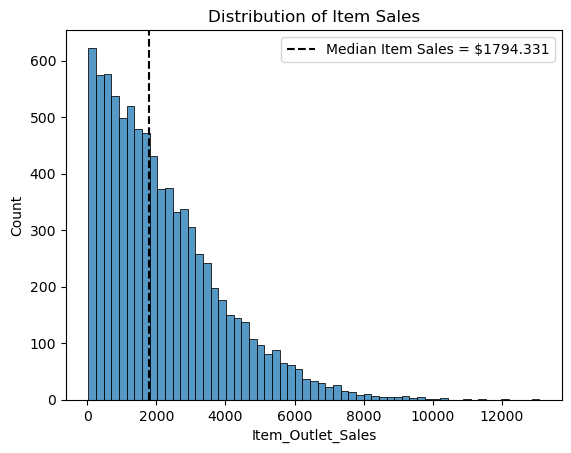

In [13]:
# Create histograms to view distributions of various features in the dataset 
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')
median = df['Item_Outlet_Sales'].median()
ax.set(title = 'Distribution of Item Sales')
ax.axvline(median, color = 'black', linestyle = '--', 
            label = f'Median Item Sales = ${median}')
ax.legend();

Our distribution of item sales data seems to be fairly right-skewed. The majority of outlets had item sales of between 0-4000. A lesser portion of the outlets studied produced above $4000 in sales.

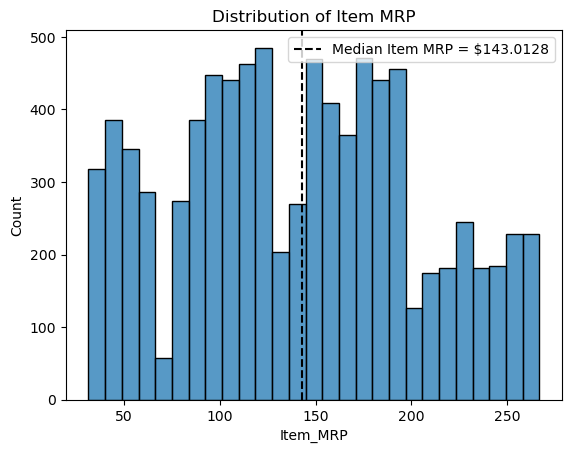

In [14]:
# Create histograms to view distributions of various features in the dataset 
ax = sns.histplot(data = df, x = 'Item_MRP')
median = df['Item_MRP'].median()
ax.set(title = 'Distribution of Item MRP')
ax.axvline(median, color = 'black', linestyle = '--', 
            label = f'Median Item MRP = ${median}')
ax.legend();

At a quick glance at our item MRP distribution, we can easily tell the prices of items at these outlets are quite high. The median item MRP is 143 dollars, quite high for groceries. On top of that, a significant portion of items are priced above 143 dollars, with some products reaching above 250 dollars. 

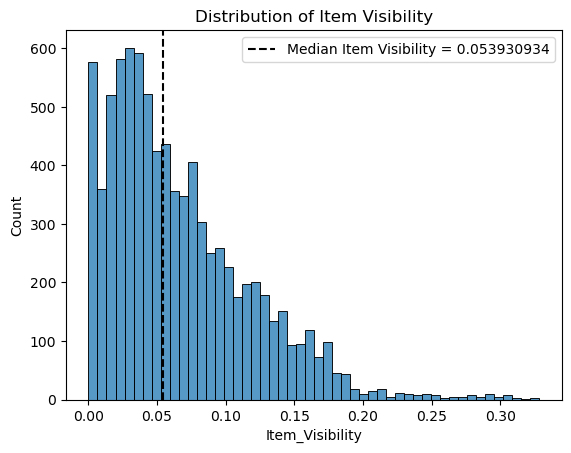

In [15]:
# Create histograms to view distributions of various features in the dataset 
ax = sns.histplot(data = df, x = 'Item_Visibility')
median = df['Item_Visibility'].median()
ax.set(title = 'Distribution of Item Visibility')
ax.axvline(median, color = 'black', linestyle = '--', 
            label = f'Median Item Visibility = {median}')
ax.legend();

The item visibility distribution is fairly right-skewed. Roughly half of items possess a lower visibility, with a median of around 0.05. Roughly half of items have a higher visibility, with some reaching up to 0.30.

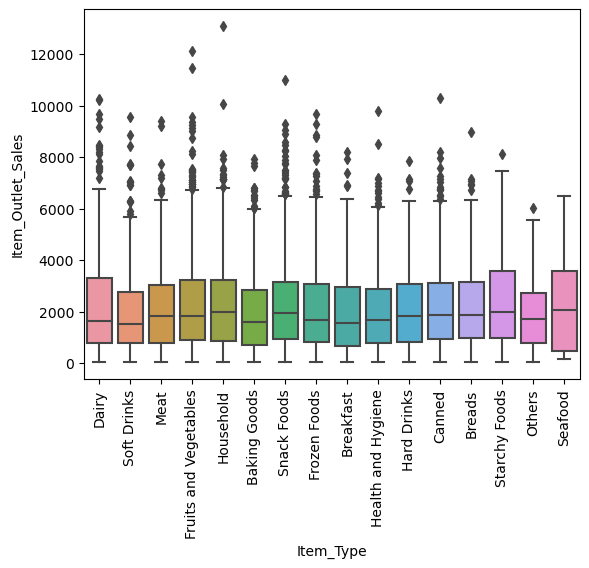

In [16]:
# Create boxplots to view statistical summaries of Item_Type and Item_Outlet_Sales
sns.boxplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 90);

According to this boxplot of item type and item sales, the type of item did not affect sales very much. Most of the item types median sales lie around $2000. The only two item types who had significantly higher maximum values were 'starchy foods' and 'seafood'. 

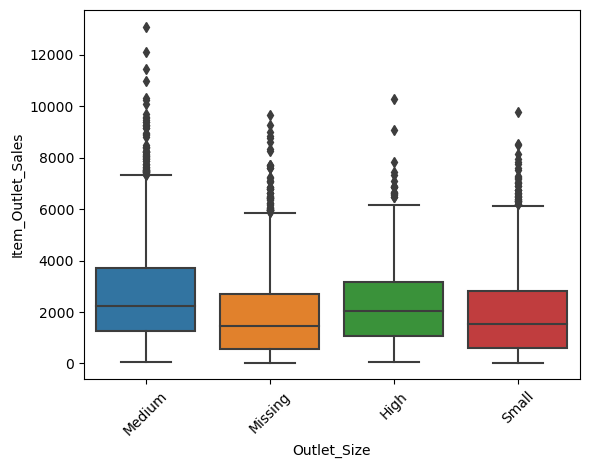

In [17]:
# Create boxplots to view statistical summaries of Outlet_Size and Item_Outlet_Sales
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 45);

According to our outlet size boxplot, the outlet size that corresponds with the highest item sales is 'medium'. This is an interesting find, as logic would imply that the largest outliet size would typically produce the most sales. 

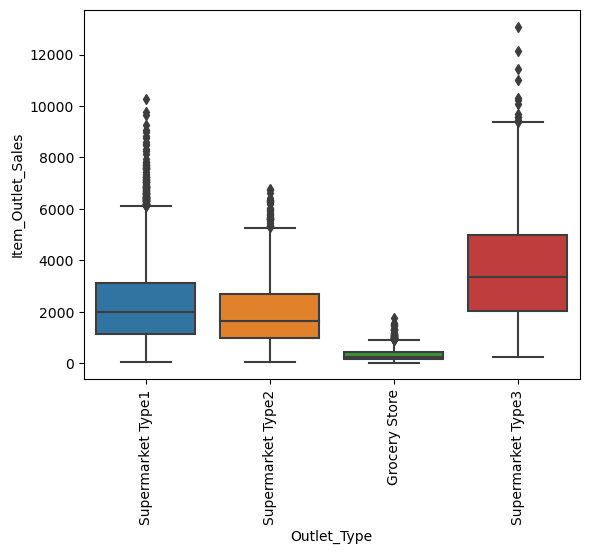

In [18]:
# Create boxplots to view statistical summaries of Outlet_Type and Item_Outlet_Sales
sns.boxplot(x = 'Outlet_Type', y = 'Item_Outlet_Sales', data = df)
plt.xticks(rotation = 90);

According to this boxplot, the outlet type that corresponds with the highest item sales is 'SupermarketType3'. Grocery stores had the lowest item sales and the other two types of supermarkets produced roughly the same amount of sales. 

/var/folders/9t/bmzypr2s7c5fdyrg9_5l57rw0000gn/T/ipykernel_78083/3997452567.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


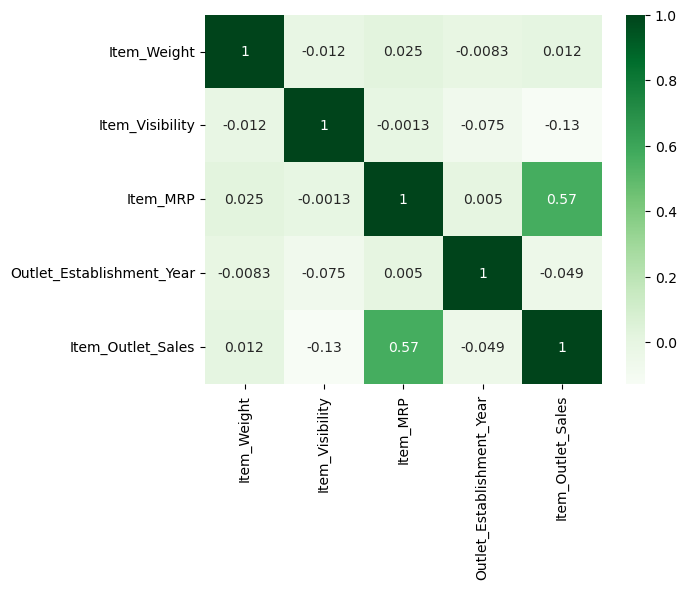

In [19]:
# Display correlation between features
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

The heatmap doesn't show any strong relationships except that of 'Item_MRP' and 'Item_Outlet_Sales'. The 0.57 positive correlation implies that as item MRP increases, so does outlet sales. 

# Explanatory Visuals

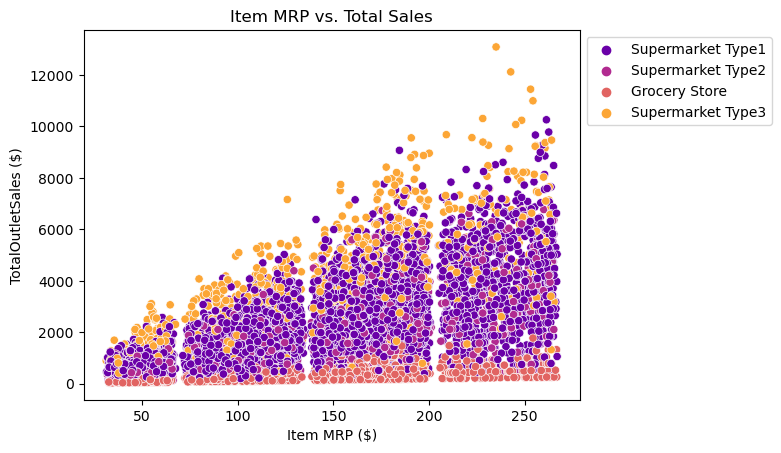

In [20]:
# Construct scatterplot of Item_MRP and Sales
ax = sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type', palette = 'plasma')
ax.set_title('Item MRP vs. Total Sales')
ax.set_xlabel('Item MRP ($)')
ax.set_ylabel('TotalOutletSales ($)')
ax.legend(bbox_to_anchor = [1,1]);

This graph illustrates several different trends between item MRP and total outlet sales. According to this scatter plot, the Outlet_Type definitely seems to influence total outlet sales. Grocery stores have much lower sales relative to the different types of supermarkets, with supermarket type 3 typically yielding the highest total sales. In addition, this plot also indicates that as item MRP increases, the outlet's total sales will likely also increase. 

/var/folders/9t/bmzypr2s7c5fdyrg9_5l57rw0000gn/T/ipykernel_78083/2024197545.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data = df, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', ci = None, marker = 'o');


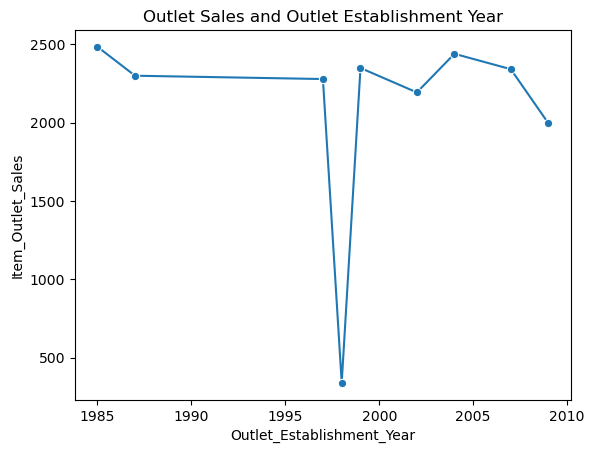

In [21]:
# Construct line plot of relationship between Outlet_Establishment_Year and Item_Outlet_Sales
ax = sns.lineplot(data = df, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', ci = None, marker = 'o');
ax.set_title('Outlet Sales and Outlet Establishment Year');

The line graph of outlet sales over time yields some interesting information. According to this graph, the most profitable outlet location is also the oldest, having been established in 1985. There was little variation in outlet sales other than what looks like around 1997, when outlet sales dipped below 500. 

# PreProcessing data

In [22]:
# 1. Import libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [23]:
# Make copy of original df
ml_df = df.copy()

In [24]:
# drop unnecessary columns
ml_df = ml_df.drop(columns=['Item_Identifier',
  'Outlet_Identifier', 'Outlet_Establishment_Year'])

In [25]:
# 3. explore data 
ml_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
# check for duplicates
ml_df.duplicated().sum()

0

In [27]:
# drop duplicates 
ml_df.drop_duplicates(inplace=True)
ml_df.duplicated().sum()

0

In [28]:
# check for missing values 
ml_df.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [29]:
# 4. Validation split 
X = ml_df.drop('Item_Outlet_Sales', axis = 1)
y = ml_df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# 5. Instantiate column selectors
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [31]:
# 6. Instantiate transformers 
# Imputers 
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

# scaler
scaler = StandardScaler()

# OHE
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [32]:
# Begin ordinal encoding
replaceDict = {'Small': 0, 'Medium' : 1, 'High': 2}
ml_df['Outlet_Size'].replace(replaceDict, inplace = True)
ml_df['Outlet_Size'].value_counts()

1          2793
Missing    2410
0          2388
2           932
Name: Outlet_Size, dtype: int64

In [33]:
# continue ordinal encoding
rDict = {'Low Fat': 0, 'LF': 0, 'low fat': 0, 'Regular': 1, 'reg': 1}
ml_df['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace(rDict)
ml_df['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace(rDict)
ml_df['Item_Fat_Content'].value_counts()

0.0    1388
1.0     743
Name: Item_Fat_Content, dtype: int64

In [34]:
# 7. Instantiate pipelines
# Numeric pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [35]:
# Categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [36]:
# 8. Instantiate ColumnTransformer
# Tuples for Column Transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13bb54880>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13bb542e0>)])

In [37]:
# 9. Transform data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13bb54880>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13bb542e0>)])

In [38]:
# transform training and testing data 
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [39]:
# 10. Inspect result
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 32)




array([[ 0.81916441, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55825754, -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12958785,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11564949, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76791667, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81916441, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

# Building regression models


## Linear regression model:

In [40]:
# train/test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
# import and instantiate linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
reg = LinearRegression()

In [42]:
# create a modeling pipline
reg_pipe = make_pipeline(preprocessor, reg)

In [43]:
# train the model on training data 
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13bb54880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13bb542e0>)])),
                ('linearregression', LinearRegression())])

In [44]:
# make predictions
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
train_pred[:5]

array([3809.5  , 2654.875, 2609.5  , 1484.625, 1946.625])

In [45]:
# calculate regression metrics
# MSE 
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Training MSE: 1298644.6327941578
Model Testing MSE: 1197377.6730283056


In [46]:
# RMSE 
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1139.5809022593164
Model Testing RMSE: 1094.247537364515


This RMSE value is rather high, probably an indication that our model is not working very well.

In [47]:
# R2 score 
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.5611880148069628
Model Testing R2: 0.5660066944660487


Our R2 scores are hovering around 56%, meaning 56% of the variation in sales can be explained by the model. 

## Regression Tree Model


In [48]:
# Step 1: import model - DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
# Step 2: make instance of model 
dec_tree = DecisionTreeRegressor(random_state = 42)

In [50]:
# Step 3: fit model onto training data
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
# Step 4: predict target values for training data
train_pred = dec_tree.predict(X_train_processed)
test_pred = dec_tree.predict(X_test_processed)

In [52]:
# Step 5: evaluate the model using R2 score
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.11810029708129777


In [53]:
# Step 6: tune model
dec_tree.get_depth()

42

In [54]:
# get # of leaf nodes
dec_tree.get_n_leaves()

6275

In [55]:
# trying depth between 2 and 39 (15)
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train_processed, y_train)
train_15_score = dec_tree_15.score(X_train_processed, y_train)
test_15_score = dec_tree_15.score(X_test_processed, y_test)
print(train_15_score)
print(test_15_score)

0.8180520009768577
0.37075304363611505


In [56]:
# List of values to try for max_depth:
depths = list(range(2, 39)) # will try every value between 2 and 39
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

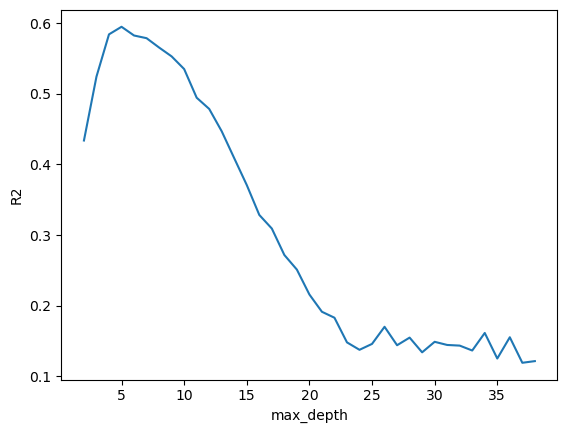

In [57]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [58]:
# find which depth corresponds with best score for model
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582356,0.615072
7,0.578571,0.626453
8,0.565333,0.642724


In [59]:
# Let's run the model with our optimized value for max_depth (7)
dec_tree_7 = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dec_tree_7.fit(X_train_processed, y_train)
train_7_score = dec_tree_7.score(X_train_processed, y_train)
test_7_score = dec_tree_7.score(X_test_processed, y_test)
print(f'Model Training R2: {train_7_score}')
print(f'Model Testing R2: {test_7_score}')

Model Training R2: 0.626452846323218
Model Testing R2: 0.5785712020820493


In [60]:
# calculate regression metrics
# MSE 
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

print(f'Model Training MSE: {train_MSE}')
print(f'Model Testing MSE: {test_MSE}')

Model Training MSE: 2.4264137179864312e-29
Model Testing MSE: 2433141.2504761354


In [61]:
# RMSE 
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 4.925864104892086e-15
Model Testing RMSE: 1559.8529579662743


# Final recommendation:

* After evaluating the regression tree model with RMSE and R2 scores, I can decisively say the decision tree model is the better model for predicting sales. The R2 scores for the regression tree model (0.62, 0.59) are slightly higher than the R2 scores for the linear regression model (0.56, 0.57), meaning that the model is doing a better job of explaining the variance in sales. In addition, the RMSE scores for the regression tree model are also  lower (better) than the linear regression model RMSE scores. This indicates that the regression tree model is making less errors in its predictions.

* May be worth noting that our data looks very overfit - meaning it makes accurate predictions on train data but the test error is very large.

* I would recommend the business proceed with the regression tree model. 

# Revisiting Project 1

In [62]:
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [63]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [64]:
ml_df = df.copy()

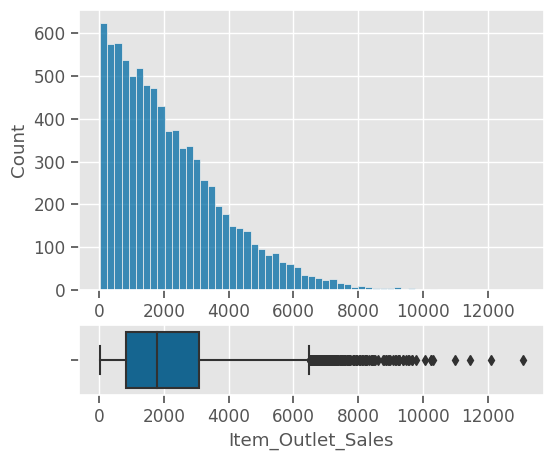

In [65]:
target = 'Item_Outlet_Sales'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=ml_df, x=target,ax=axes[0])
sns.boxplot(data=ml_df, x=target, ax=axes[1]);

# Preprocessing (with Sklearn v1.1+) 

In [66]:
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.9.15
sklearn version: 1.1.3


In [67]:
# drop unnecessary columns
ml_df = ml_df.drop(columns=['Item_Identifier',
  'Outlet_Identifier', 'Outlet_Establishment_Year'])

In [68]:
## Train Test Split
## Make x and y variables
target = "Item_Outlet_Sales"
drop_feats = []

y = ml_df[target].copy()
X = ml_df.drop(columns=[target, *drop_feats]).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.220,Regular,0.064142,Baking Goods,61.2510,Missing,Tier 3,Grocery Store
7604,6.135,Low Fat,0.079294,Soft Drinks,111.2860,Medium,Tier 3,Supermarket Type2
2762,12.150,Low Fat,0.028593,Household,151.0708,Small,Tier 2,Supermarket Type1


In [69]:
## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [70]:
## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [71]:
## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13c842610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13c82ac70>)])

## Make X_train_df and X_test_df with feature names extracted

In [72]:
## make the preprocessing column transformer WITH CORRECT ARGS!
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.220000,0.064142,61.2510,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,6.135000,0.079294,111.2860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,12.150000,0.028593,151.0708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,5.945000,0.093009,127.8652,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,18.200000,0.066285,247.2092,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,12.857645,0.012216,162.7894,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8360,11.500000,0.014884,174.5080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5929,5.110000,0.034945,161.1210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4220,6.550000,0.034800,157.5288,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Modeling - Linear Regression


In [73]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [74]:
# instantiate/fit model
lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.56,827.03,"1,115.77"
Test,0.56,859.92,"1,164.92"


## View Coefficients

In [75]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [76]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                           1.198943
Item_Visibility                    -269.512379
Item_MRP                             15.596607
Item_Fat_Content_Low Fat            -15.482224
Item_Fat_Content_Regular             15.482224
Item_Type_Baking Goods               10.227471
Item_Type_Breads                     -5.467471
Item_Type_Breakfast                  71.562755
Item_Type_Canned                     22.471670
Item_Type_Dairy                     -47.810372
Item_Type_Frozen Foods               -1.927089
Item_Type_Fruits and Vegetables      16.226011
Item_Type_Hard Drinks                44.533184
Item_Type_Health and Hygiene        -39.344181
Item_Type_Household                 -68.592774
Item_Type_Meat                      -16.528288
Item_Type_Others                     16.034338
Item_Type_Seafood                    95.273440
Item_Type_Snack Foods               -10.455612
Item_Type_Soft Drinks              -114.602878
Item_Type_Starchy Foods              28.399795
Outlet_Size_H

In [77]:
## format and round
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")
pd.set_option('display.max_rows', None)

In [78]:
coeffs.sort_values()

Outlet_Type_Grocery Store         -1,590.41
Item_Visibility                     -269.51
Outlet_Type_Supermarket Type2       -185.64
intercept                           -138.33
Outlet_Size_Missing                 -115.12
Item_Type_Soft Drinks               -114.60
Outlet_Location_Type_Tier 1          -87.43
Item_Type_Household                  -68.59
Item_Type_Dairy                      -47.81
Item_Type_Health and Hygiene         -39.34
Outlet_Size_High                     -21.67
Item_Type_Meat                       -16.53
Item_Fat_Content_Low Fat             -15.48
Item_Type_Snack Foods                -10.46
Item_Type_Breads                      -5.47
Item_Type_Frozen Foods                -1.93
Item_Weight                            1.20
Item_Type_Baking Goods                10.23
Item_Fat_Content_Regular              15.48
Item_MRP                              15.60
Item_Type_Others                      16.03
Item_Type_Fruits and Vegetables       16.23
Outlet_Location_Type_Tier 3     

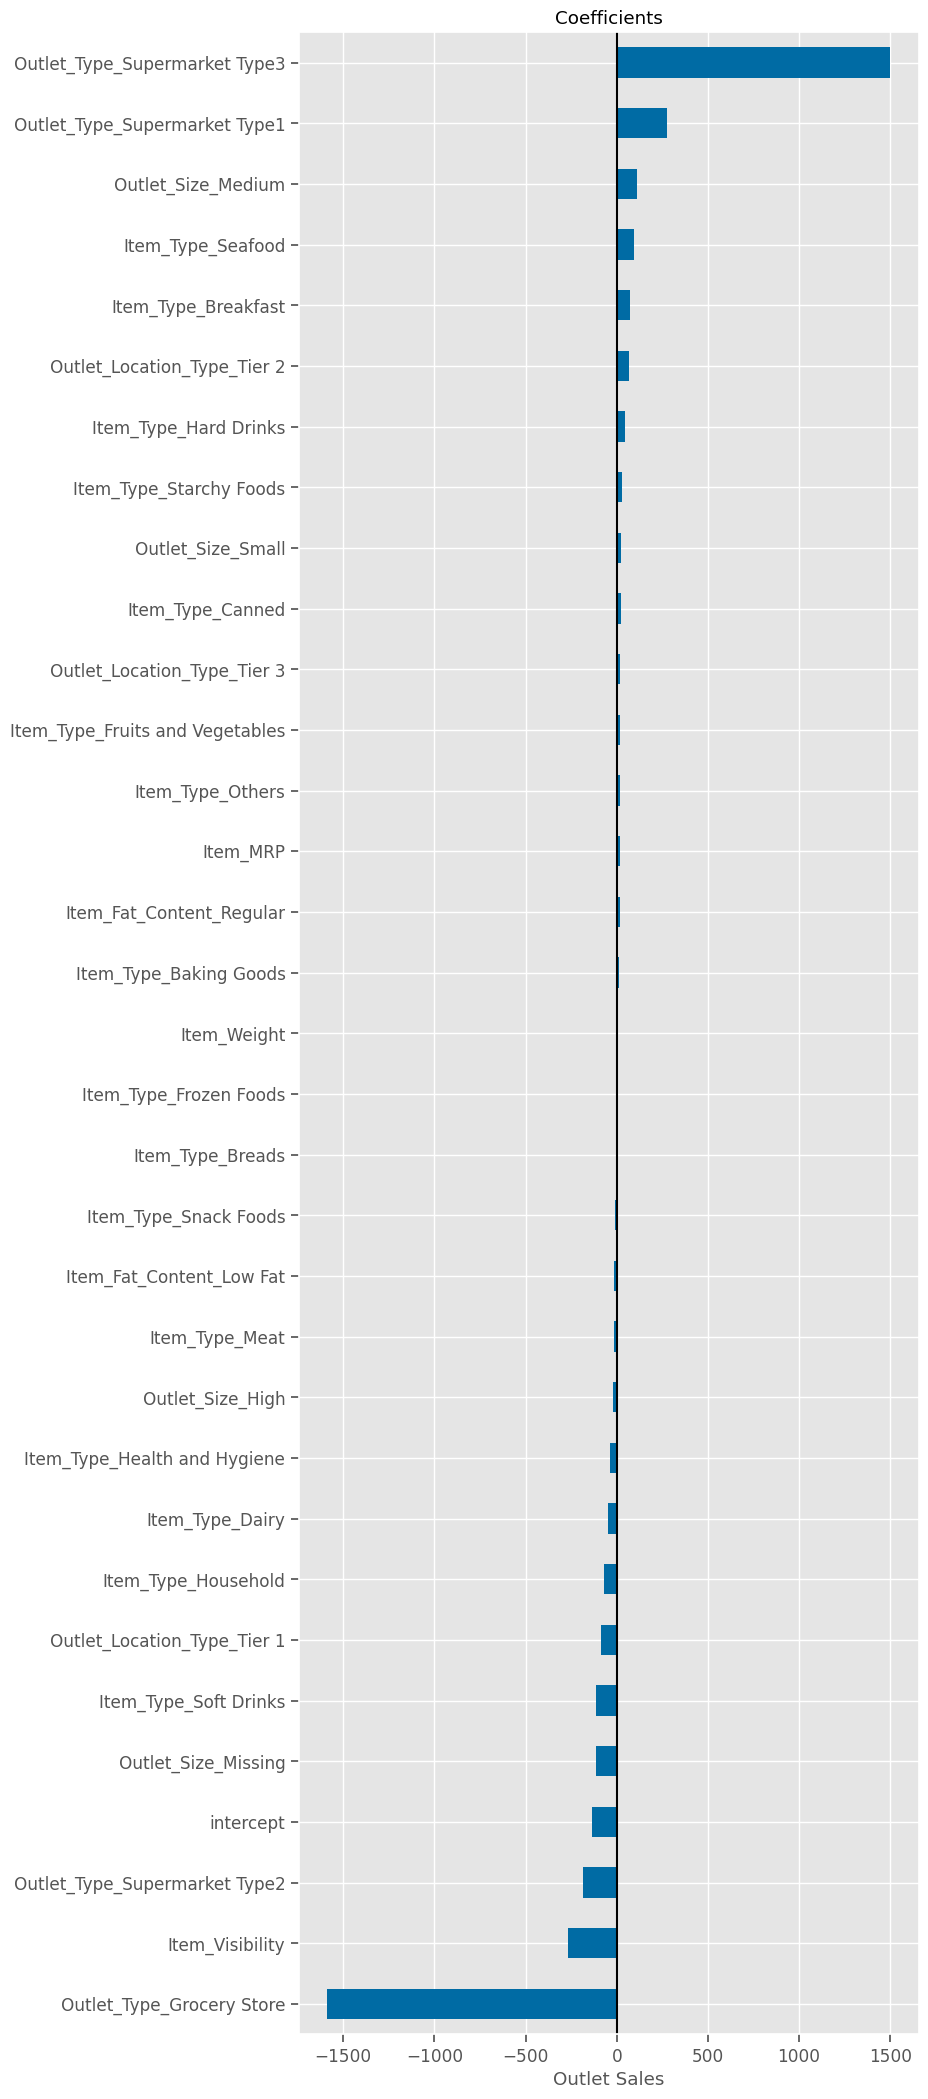

In [79]:
## Plot ceoffs
ax = coeffs.sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0, color='k')
ax.set(xlabel='Outlet Sales', title="Coefficients");

In [80]:
# extract top 3 most impactful features
sorted_coeffs = coeffs.reindex(coeffs.abs().sort_values().index)
top3 = sorted_coeffs.tail(3)

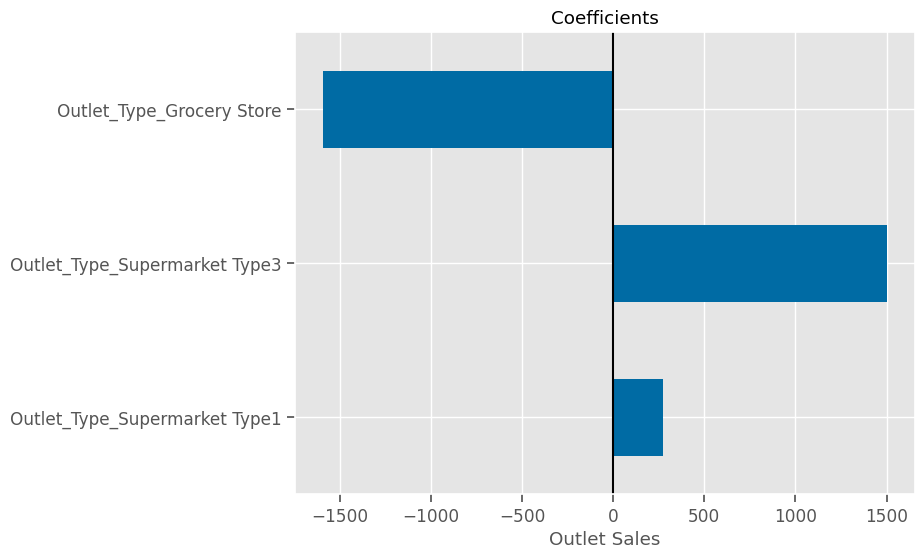

In [81]:
# plot top 3
ax = top3.plot(kind='barh', figsize=(8,6))
ax.axvline(0, color='k')
ax.set(xlabel='Outlet Sales', title="Coefficients");
plt.savefig('top3coeffs.png', dpi = 300)

## Interpret coefficients:
* Our top 3 most impactful features were **Outlet_Type_Grocery_Store**, **Outlet_Type_SupermarketType3** and **Outlet_Type_SupermarketType1**
* Basically, the type of outlet/store determined the sales of that establishment. 
* If the outlet/store type was a grocery store, sales would typically drop by 1500.
* If the store was a Supermarket Type3, sales would increase by 1500. 
* Type1 typically increased sales by around 250. 
* (currency is Rupees)

# Tree-Based Model

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
# instantiate/fit model
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train_df,y_train)
evaluate_regression(rf, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.94,294.67,426.13
Test,0.55,829.02,"1,176.91"


In [84]:
## Saving the coefficients
importances = pd.Series(rf.feature_importances_, index= rf.feature_names_in_)
importances

Item_Weight                       0.05
Item_Visibility                   0.10
Item_MRP                          0.45
Item_Fat_Content_Low Fat          0.00
Item_Fat_Content_Regular          0.00
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.01
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.01
Item_Type_Soft Drinks             0.00
Item_Type_Starchy Foods           0.00
Outlet_Size_High                  0.00
Outlet_Size_Medium                0.01
Outlet_Size_Missing               0.01
Outlet_Size_Small                 0.01
Outlet_Location_Type_Tier

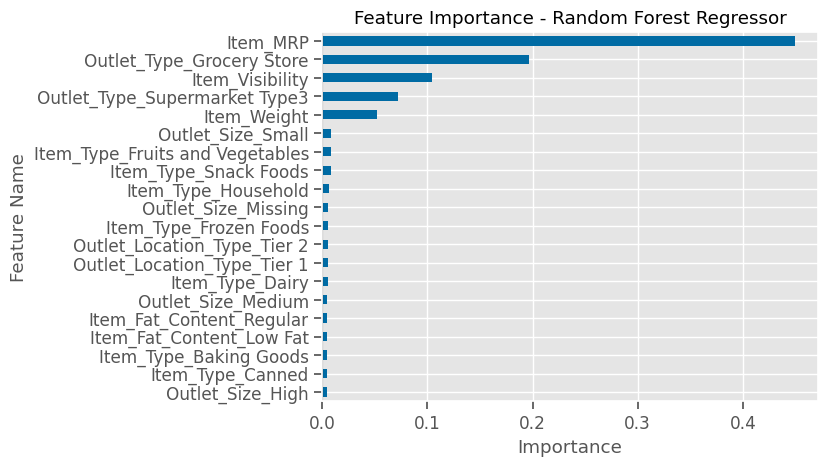

In [85]:
ax = importances.sort_values().tail(20).plot(kind='barh')
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Random Forest Regressor',ylabel="Feature Name",
      xlabel='Importance');

In [86]:
# extract top 5 most important features
sorted_imp = importances.reindex(importances.abs().sort_values().index)
most5 = sorted_imp.tail(5)

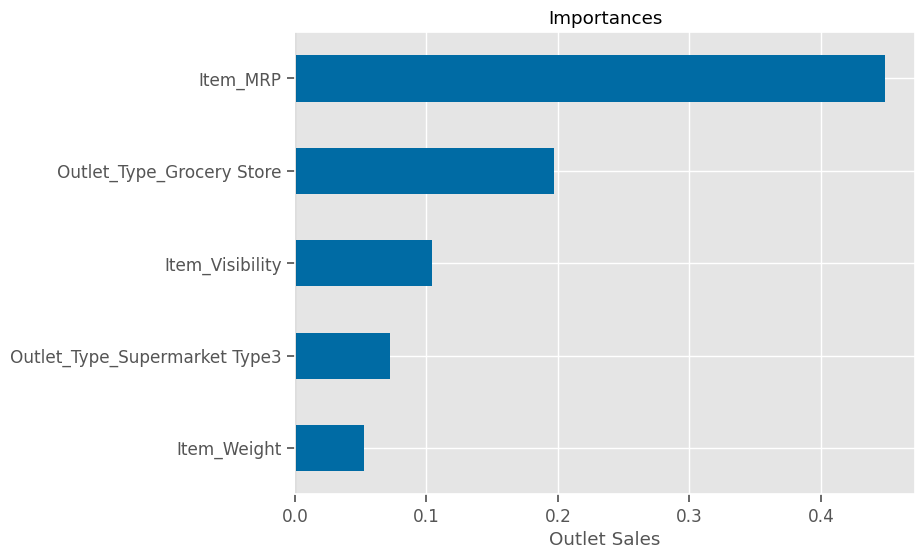

In [87]:
# plot most important 5 features
ax = most5.plot(kind='barh', figsize=(8,6))
ax.axvline(0, color='k')
ax.set(xlabel='Outlet Sales', title="Importances");
plt.savefig('most5importances.png', dpi = 300)

## Interpret importances
* The 5 features graphed above had the most impact on outlet sales according to the RandomForest. Item_MRP had the most impact, followed by whether or not the store was a grocery store. Surprisingly, Item_Weight also was in the top 5 most important features for determining sales.


# Serialize Best Models with Joblib

In [101]:
import joblib, os

## creating a dictionary of all of the variables to save for later
export = {'X_train': X_train,
         'y_train': y_train,
         'X_test': X_test,
         'y_test': y_test,
          'preprocessor': preprocessor,
         'LinearRegression': lin_reg,
          'RandomForestRegressor': rf
         }

In [111]:
folder = "Models/"
os.makedirs(folder, exist_ok=True)

In [112]:
fname = folder+'best-models.joblib'
joblib.dump(export, fname)

['Models/best-models.joblib']

In [113]:
loaded = joblib.load(fname)
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])